In [58]:
# 필요한 기능들
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import pandas as pd
import numpy as np
from matplotlib import rc

# 경고 메세지 무시
import os
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

# 한글 안 깨지게 하기
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})


# csv 파일 가져오기
df = pd.read_csv('C:/Users/user/Desktop/머신러닝 학습소/1102contest/eunpyeong.csv', encoding='cp949')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   시군구                         11 non-null     object 
 1   읍면동                         11 non-null     object 
 2   거주등록인구수                     11 non-null     int64  
 3   공원개수                        11 non-null     int64  
 4   공원면적                        11 non-null     int64  
 5   1인당공원면적                     11 non-null     float64
 6   녹지개수                        11 non-null     int64  
 7   녹지면적                        11 non-null     int64  
 8   1인당녹지면적                     11 non-null     float64
 9   녹지공원총합                      11 non-null     int64  
 10  녹지공원면적총합                    11 non-null     int64  
 11  1인당녹지공원면적총합                 11 non-null     float64
 12  도시재생사업개수                    11 non-null     int64  
 13  버스정류장개수                     11 non-nu

In [60]:
# 버리기
df_new = df.drop(['시군구', '거주등록인구수', '공원면적', '1인당공원면적', '녹지개수', '녹지면적', 
                  '1인당녹지면적', '녹지공원총합', '녹지공원면적총합', '1인당녹지공원면적총합', '도시재생사업개수', '지하철역개수',
                  '기초수급자인구밀도 (인원 수 / 면적 (k㎡))', '저소득층가구비율', '미세먼지농도'], axis=1)

In [61]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   읍면동        11 non-null     object 
 1   공원개수       11 non-null     int64  
 2   버스정류장개수    11 non-null     int64  
 3   토지공시지가평균   11 non-null     float64
 4   주간평균생활인구수  11 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 568.0+ bytes


In [62]:
df_new.describe()

,공원개수,버스정류장개수,토지공시지가평균,주간평균생활인구수
count,11.000000,11.000000,1.100000e+01,11.000000
mean,7.636364,46.909091,3.369254e+06,34586.829394
std,4.863594,24.043521,7.429448e+05,15452.876627
min,2.000000,16.000000,1.444670e+06,10207.003330
25%,4.000000,25.500000,3.240431e+06,25960.891670
50%,7.000000,52.000000,3.511362e+06,36938.633330
75%,10.000000,68.000000,3.623019e+06,43413.041660
max,18.000000,80.000000,4.467928e+06,57383.116670


<AxesSubplot:xlabel='주간평균생활인구수', ylabel='공원개수'>

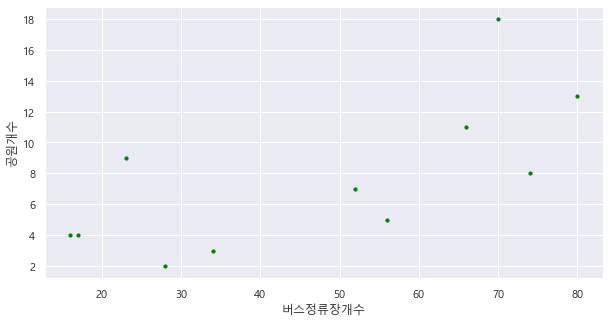

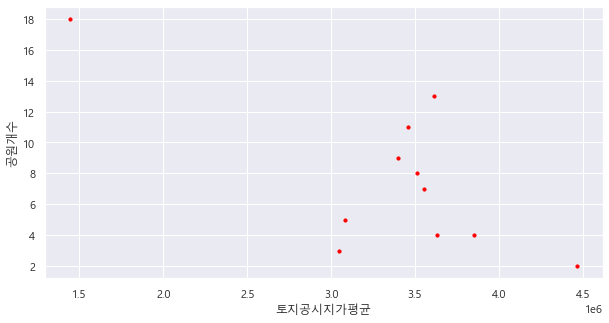

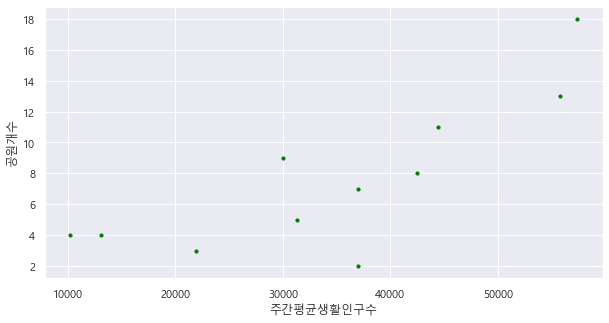

In [63]:
# 산점도
df_new.plot(kind = 'scatter', x = '버스정류장개수', y = '공원개수', c = 'green', s = 10, figsize = (10, 5))
df_new.plot(kind = 'scatter', x = '토지공시지가평균', y = '공원개수', c = 'red', s = 10, figsize = (10, 5))
df_new.plot(kind = 'scatter', x = '주간평균생활인구수', y = '공원개수', c = 'green', s = 10, figsize = (10, 5))

In [64]:
df_new.head()

,읍면동,공원개수,버스정류장개수,토지공시지가평균,주간평균생활인구수
0,갈현동,8,74,3511361.699,42426.64666
1,구산동,3,34,3049121.216,21918.81667
2,녹번동,9,23,3399515.343,30002.96667
3,대조동,2,28,4467927.803,37022.56667
4,불광동,11,66,3459226.901,44399.43666


In [42]:
df_real = df_new.drop(['읍면동'], axis = 1)

In [57]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   공원개수       11 non-null     float64
 1   버스정류장개수    11 non-null     float64
 2   토지공시지가평균   11 non-null     float64
 3   주간평균생활인구수  11 non-null     float64
dtypes: float64(4)
memory usage: 480.0 bytes


In [71]:
X = df_real[['버스정류장개수', '토지공시지가평균', '주간평균생활인구수']]
y = df_real['공원개수']

In [75]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_) # 독립변수 개수만큼 생성된다.

a value =  13.342729075811075
b value =  [ 6.06722517e-02 -3.36295500e-06  7.09147890e+02]


In [76]:
# 적합도 검증 - 잔차
residuals = y-prediction
residuals.describe()

count    1.100000e+01
mean    -8.074349e-16
std      2.618702e+00
min     -4.863858e+00
25%     -5.624767e-01
50%      3.024308e-01
75%      1.442554e+00
max      3.948142e+00
Name: 공원개수, dtype: float64

In [77]:
# 적합도 검증 - 결정계수
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.7100938172632372


In [79]:
# 결정계수 71%는 독립변수들이 종속변수에 상당한 영향을 주는 것을 확인 가능하다.
# 생성된 회귀분석모델에 대한 결정계수 MSE, RMSE를 구해보자. 
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.7100938172632372
Mean_Squared_Error =  6.234180888273198
RMSE =  2.496834173162727


In [95]:
import statsmodels.api as sm

# 상수항 추가
X1 = sm.add_constant(X, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y, X1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   공원개수   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     5.715
Date:                Wed, 26 Oct 2022   Prob (F-statistic):             0.0269
Time:                        13:46:59   Log-Likelihood:                -25.674
No. Observations:                  11   AIC:                             59.35
Df Residuals:                       7   BIC:                             60.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3427      6.164      2.165      0.067      -1.233      27.919
버스정류장개수        0.0607      0.074      0.823      0.438      -0.114       0.235
토지공시지가평균   -3.363e-06   1.48e-06     -2.279      0.057   -6.85e-06    1.26e-07
주간평균생활인구수    709.1479   1009.807      0.702      0.505   -1678.666    3096.962
==============================================================================
Omnibus:                        1.564   Durbin-Watson:                   2.245
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                0.765
Skew:                          -0.632   Prob(JB):                        0.682
Kurtosis:                       2.731   Cond. No.                     3.68e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
fitted_multi_model.params # 다중회귀모델 계수

const         13.342729
버스정류장개수        0.060672
토지공시지가평균      -0.000003
주간평균생활인구수    709.147890
dtype: float64

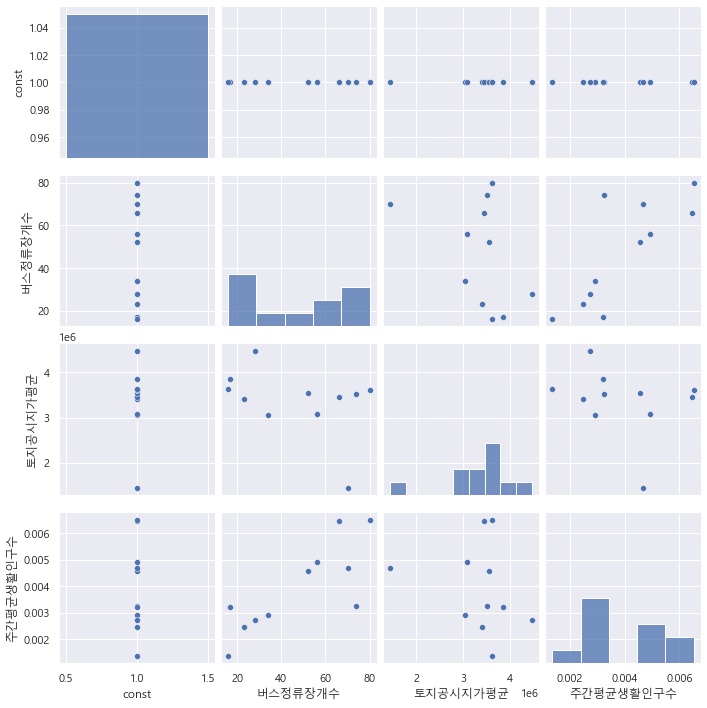

In [101]:
sns.pairplot(X1)
plt.show() # 변수끼리 산점도 시각화

In [111]:
# vif를 통한 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.

vif["VIF Fctor"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["features"] = X.columns
vif

,VIF Fctor,features
0,14.575327,버스정류장개수
1,4.890775,토지공시지가평균
2,20.314133,주간평균생활인구수
